In [2]:
import h2o
# Initialize and start an H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 11 hours 59 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_szhuang_addsht
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.652 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [5]:
# Import a sample dataset into H2O
url = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/data/loan.csv"
df = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.columns

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'revol_util',
 'total_acc',
 'bad_loan',
 'longest_credit_length',
 'verification_status']

In [7]:
# Specify the response and predictor columns
response = "bad_loan"
predictors = df.columns
predictors.remove(response)
# Convert the response column to a factor
df[response] = df[response].asfactor()

In [8]:
# Split the data into training and validation sets
train, valid = df.split_frame(ratios=[0.8], seed=1234)

In [9]:
# Define and train the GBM model
model = H2OGradientBoostingEstimator(ntrees=50, max_depth=6, learn_rate=0.1)

In [10]:
model.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1699115688778_140


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          46112                  6            6            6             34            64            56.18

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13033986643094578
RMSE: 0.36102612984512045
LogLoss: 0.4154492780753417
Mean Per-Class Error: 0.3296200057182921
AUC: 0.7477583323473345
AUCPR: 0.4232670339509739
Gini: 0.49551666469466893

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23561310418752532
       0      1      Error    Rate
-----  -----  -----  -------  ------------------
0      85133  22172  0.2066   (22172.0/107305.0)
1      10865  13140  0.4526   (10865.0/24005.0)
Total  95998  35312  0.2516   (33037.0/131310.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.235613     0.443043  197
max f2                       0.130008     0.586071  294
max f0point5                 0.323695     0.435481  133
max accuracy                 0.438593     0.826243  71
max precision                0.793726     1         0
max recall                   0.0258689    1         395
max specificity              0.793726     1         0
max absolute_mcc             0.255437     0.299277  180
max min_per_class_accuracy   0.189018     0.676632  237
max mean_per_class_accuracy  0.199317     0.677492  228
max tns                      0.793726     107305    0
max fns                      0.793726     24004     0
max fps                      0.0183635    107305    399
max tps                      0.0258689    24005     395
max tnr                      0.793726     1         0
max fnr                      0.793726     0.999958  0
max fpr                      0.0183635    1         399
max tpr                      0.0258689    1         395

Gains/Lift Table: Avg response rate: 18.28 %, avg score: 18.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100069                   0.522871           4.14213   4.14213            0.75723          0.573684   0.75723                     0.573684            0.0414497       0.0414497                  314.213   314.213            0.0384769
2        0.0200061                   0.478707           3.38705   3.76474            0.619193         0.498916   0.688238                    0.536314            0.0338679       0.0753176                  238.705   276.474            0.0676852
3        0.0300053                   0.447906           3.00794   3.51253            0.549886         0.462622   0.642132                    0.511756            0.0300771       0.105395                   200.794   251.253            0.0922546
4        0.0400046                   0.425589           2.84962   3.34684            0.520944         0.436397   0.611841                    0.49292             0.0284941       0.133889                   184.962   234.684            0.114887
5        0.0500038                   0.406679           2.61632   3.20076            0.478294         0.416012   0.585

In [12]:
# Display the model summary
print(model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1699115688778_140


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          46112                  6            6            6             34            64            56.18

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13033986643094578
RMSE: 0.36102612984512045
LogLoss: 0.4154492780753417
Mean Per-Class Error: 0.3296200057182921
AUC: 0.7477583323473345
AUCPR: 0.4232670339509739
Gini: 0.49551666469466893

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23561310418752532
       0      1      Error    Rate
-----  -----  -----  -------  --------------

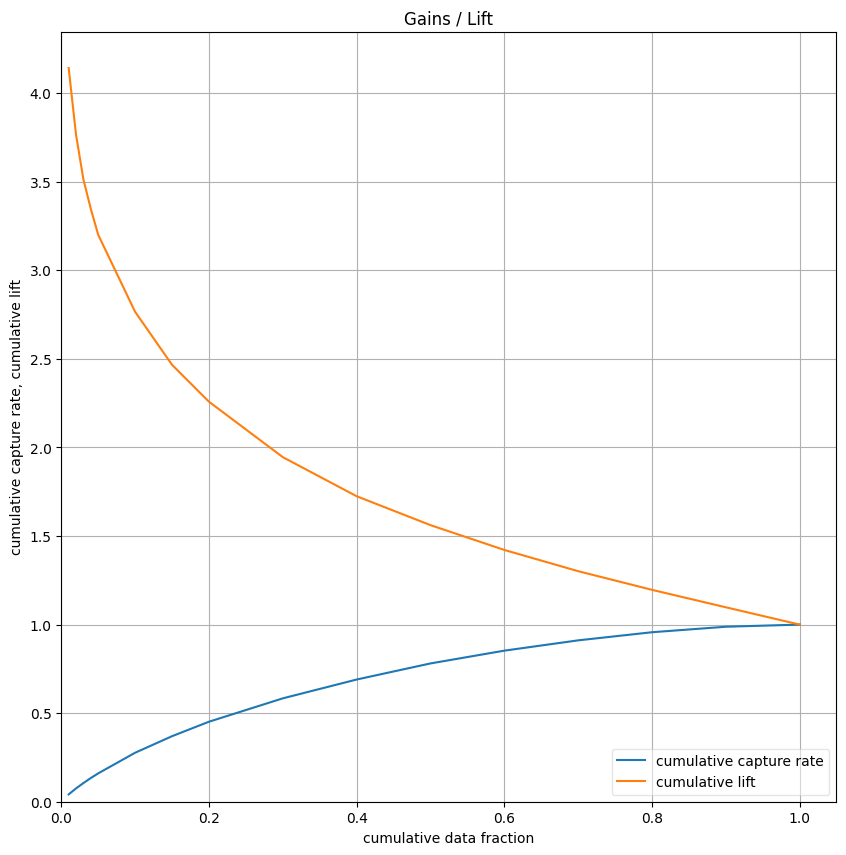

group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100069,0.5228705,4.1421308,4.1421308,0.7572298,0.5736843,0.7572298,0.5736843,0.0414497,0.0414497,314.2130778,314.2130778,0.0384769
2,0.0200061,0.4787071,3.3870524,3.7647353,0.6191927,0.4989159,0.6882375,0.5363143,0.0338679,0.0753176,238.7052361,276.4735284,0.0676852
3,0.0300053,0.4479055,3.0079358,3.5125328,0.5498858,0.4626220,0.6421320,0.5117565,0.0300771,0.1053947,200.7935799,251.2532816,0.0922546
4,0.0400046,0.4255891,2.8496234,3.3468370,0.5209444,0.4363966,0.6118409,0.4929201,0.0284941,0.1338888,184.9623389,234.6837008,0.1148869
5,0.0500038,0.4066788,2.6163209,3.2007560,0.4782940,0.4160115,0.5851355,0.4775407,0.0261612,0.1600500,161.6320889,220.0756036,0.1346644
6,0.1,0.3439854,2.3305253,2.7656738,0.4260472,0.3725239,0.5055974,0.4250363,0.1165174,0.2765674,133.0525327,176.5673818,0.2160669
7,0.1500038,0.3017702,1.8686350,2.4666457,0.3416083,0.3218686,0.4509316,0.3906454,0.0934389,0.3700062,86.8635031,146.6645708,0.2692188
8,0.2,0.2696774,1.6331175,2.2582795,0.2985529,0.2849466,0.4128398,0.3642227,0.0816497,0.4516559,63.3117498,125.8279525,0.3079534
9,0.3,0.2216515,1.3197251,1.9454280,0.2412611,0.2442617,0.3556469,0.3242357,0.1319725,0.5836284,31.9725057,94.5428036,0.3470784
10,0.4,0.1843940,1.0622787,1.7246407,0.1941969,0.2022836,0.3152844,0.2937477,0.1062279,0.6898563,6.2278692,72.4640700,0.3546995


In [13]:
model.gains_lift_plot()

In [ ]:
# Shutdown the H2O cluster
h2o.shutdown()